### 출처: Won Joon Yoo, Introduction to Deep Learning for Natural Language Processing, Wikidocs</br>
### https://wikidocs.net/book/2155

### 영어 Word2Vec 만들기

In [1]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/leok/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [2]:
import urllib.request
import zipfile
from lxml import etree
import re
from nltk.tokenize import word_tokenize, sent_tokenize

In [3]:
# 데이터 다운로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/GaoleMeng/RNN-and-FFNN-textClassification/master/ted_en-20160408.xml", filename="ted_en-20160408.xml")

('ted_en-20160408.xml', <http.client.HTTPMessage at 0x7fae5356b6d0>)

In [4]:
targetXML=open('ted_en-20160408.xml', 'r', encoding='UTF8')
target_text = etree.parse(targetXML)
# etree : element tree 태그 구조화

In [5]:
# xml 파일로부터 <content>와 </content> 사이의 내용만 가져온다.
parse_text = '\n'.join(target_text.xpath('//content/text()'))

In [6]:
parse_text[:800]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.\nConsider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.\nTo me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calcu"

In [7]:
# 정규 표현식의 sub 모듈을 통해 content 중간에 등장하는 (Audio), (Laughter) 등의 배경음 부분을 제거.
# 해당 코드는 괄호로 구성된 내용을 제거.
content_text = re.sub(r'\([^)]*\)', '', parse_text)

In [8]:
content_text[:800]

"Here are two reasons companies fail: they only do more of the same, or they only do what's new.\nTo me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation. Both are necessary, but it can be too much of a good thing.\nConsider Facit. I'm actually old enough to remember them. Facit was a fantastic company. They were born deep in the Swedish forest, and they made the best mechanical calculators in the world. Everybody used them. And what did Facit do when the electronic calculator came along? They continued doing exactly the same. In six months, they went from maximum revenue ... and they were gone. Gone.\nTo me, the irony about the Facit story is hearing about the Facit engineers, who had bought cheap, small electronic calcu"

In [9]:
# 입력 코퍼스에 대해서 NLTK를 이용하여 문장 토큰화를 수행.
sent_text = sent_tokenize(content_text)

In [10]:
sent_text[:5]

["Here are two reasons companies fail: they only do more of the same, or they only do what's new.",
 'To me the real, real solution to quality growth is figuring out the balance between two activities: exploration and exploitation.',
 'Both are necessary, but it can be too much of a good thing.',
 'Consider Facit.',
 "I'm actually old enough to remember them."]

In [11]:
# 각 문장에 대해서 구두점을 제거하고, 대문자를 소문자로 변환.
normalized_text = []
for string in sent_text:
     tokens = re.sub(r"[^a-z0-9]+", " ", string.lower())
     normalized_text.append(tokens)

In [12]:
normalized_text[:5]

['here are two reasons companies fail they only do more of the same or they only do what s new ',
 'to me the real real solution to quality growth is figuring out the balance between two activities exploration and exploitation ',
 'both are necessary but it can be too much of a good thing ',
 'consider facit ',
 'i m actually old enough to remember them ']

In [13]:
# 각 문장에 대해서 NLTK를 이용하여 단어 토큰화를 수행.
result = [word_tokenize(sentence) for sentence in normalized_text]

In [14]:
print('총 샘플의 개수 : {}'.format(len(result)))

총 샘플의 개수 : 273424


In [15]:
result[:1]

[['here',
  'are',
  'two',
  'reasons',
  'companies',
  'fail',
  'they',
  'only',
  'do',
  'more',
  'of',
  'the',
  'same',
  'or',
  'they',
  'only',
  'do',
  'what',
  's',
  'new']]

### Word2Vec 훈련시키기

In [16]:
from gensim.models import Word2Vec
model = Word2Vec(sentences=result, size=100, window=5, min_count=5, workers=4, sg=0)

In [17]:
# word2vec을 이용해서 단어 유사도 확인
model_result = model.wv.most_similar("man")
print(model_result)

[('woman', 0.857213020324707), ('guy', 0.8180757761001587), ('lady', 0.7956372499465942), ('boy', 0.7779396772384644), ('girl', 0.7724066972732544), ('gentleman', 0.7569496631622314), ('soldier', 0.746048092842102), ('kid', 0.706943154335022), ('poet', 0.701694667339325), ('rabbi', 0.6715877056121826)]


### Word2Vec 모델 저장하고 로드하기

In [18]:
from gensim.models import KeyedVectors
model.wv.save_word2vec_format('eng_w2v') # 모델 저장
loaded_model = KeyedVectors.load_word2vec_format("eng_w2v") # 모델 로드

In [19]:
model_result = loaded_model.most_similar("man")
print(model_result)

[('woman', 0.857213020324707), ('guy', 0.8180757761001587), ('lady', 0.7956372499465942), ('boy', 0.7779396772384644), ('girl', 0.7724066972732544), ('gentleman', 0.7569496631622314), ('soldier', 0.746048092842102), ('kid', 0.706943154335022), ('poet', 0.701694667339325), ('rabbi', 0.6715877056121826)]


### 한국어 Word2Vec 만들기(네이버 영화 리뷰)

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [21]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7fae0f499a30>)

In [22]:
train_data = pd.read_table('ratings.txt')

In [23]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [24]:
len(train_data)

200000

In [25]:
# document에 null값 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        200000 non-null  int64 
 1   document  199992 non-null  object
 2   label     200000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 4.6+ MB


In [26]:
# null 값이 존재하는 행 제거
train_data = train_data.dropna(how = 'any')
# null 값이 존재하는지 확인
train_data.isnull().values.any()

False

In [27]:
# document에 null값 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199992 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        199992 non-null  int64 
 1   document  199992 non-null  object
 2   label     199992 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 6.1+ MB


In [28]:
# 정규 표현식을 통한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

<ipython-input-28-d10eedfa8951>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [29]:
train_data[:5]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산업...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런게 진짜 영화지,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [30]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [31]:
# 형태소 분석기 OKT를 사용한 토큰화 작업 (다소 시간 소요)
okt = Okt()
tokenized_data = []
for sentence in train_data['document']:
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    tokenized_data.append(temp_X)

리뷰의 최대 길이 : 72
리뷰의 평균 길이 : 10.716703668146726


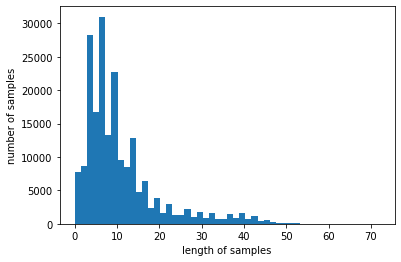

In [32]:
# 리뷰 길이 분포 확인
print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [33]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [34]:
# 완성된 임베딩 매트릭스의 크기 확인
model.wv.vectors.shape

(16477, 100)

In [35]:
print(model.wv.most_similar("주성치"))

[('무협', 0.7369053959846497), ('스나입스', 0.7152756452560425), ('할리우드', 0.7144717574119568), ('디즈니', 0.7137994170188904), ('지브리', 0.7136949896812439), ('대부', 0.7129262685775757), ('이연걸', 0.7124911546707153), ('갱스터', 0.7108452320098877), ('원조', 0.7094882726669312), ('타란티노', 0.7084393501281738)]


In [36]:
print(model.wv.most_similar("명작"))

[('대작', 0.8608598113059998), ('걸작', 0.7598099112510681), ('수작', 0.750504732131958), ('망작', 0.7339264154434204), ('졸작', 0.7159639596939087), ('애니메이션', 0.6436218023300171), ('명화', 0.5839025974273682), ('괴작', 0.5600670576095581), ('작품', 0.5508911609649658), ('년작', 0.5499779582023621)]


### 사전 훈련된 Word2Vec 임베딩

영어

In [37]:
import gensim

# 구글의 사전 훈련된 Word2Vec 모델을 로드합니다.
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True) 

In [38]:
print(model.vectors.shape) # 모델의 크기 확인

(3000000, 300)


In [39]:
print (model.similarity('this', 'is')) # 두 단어의 유사도 계산하기
print (model.similarity('post', 'book'))

0.40797037
0.057204384


In [40]:
print(model['book']) # 단어 'book'의 벡터 출력

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

한국어

In [ ]:
import gensim
model = gensim.models.Word2Vec.load('./ko/ko.bin')

In [ ]:
result = model.wv.most_similar("강아지")
print(result)